In [ ]:
"""
DATE	Value
0	01-2000	102.2301
1	02-2000	94.2989
2	03-2000	88.0927
3	04-2000	81.4425
4	05-2000	84.4552
"""

'\n\tmonth\tyear\tValue\n0\t1\t2000\t102.2301\n1\t2\t2000\t94.2989\n2\t3\t2000\t88.0927\n3\t4\t2000\t81.4425\n4\t5\t2000\t84.4552\nupto 2017\n'

In [15]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [8]:
# load data
df = pd.read_csv('Electric_Consumption.csv')
df.head()

,DATE,Value
0,01-2000,102.2301
1,02-2000,94.2989
2,03-2000,88.0927
3,04-2000,81.4425
4,05-2000,84.4552


In [10]:
# Convert DATE column to datetime format
df['DATE'] = pd.to_datetime(df['DATE'], format='%m-%Y')

# Feature Engineering for Time
df['Month'] = df['DATE'].dt.month
df['Year'] = df['DATE'].dt.year
df['Time'] = np.arange(len(df))  # Numerical representation of time

In [11]:
df.head()

,DATE,Value,Month,Year,Time
0,2000-01-01,102.2301,1,2000,0
1,2000-02-01,94.2989,2,2000,1
2,2000-03-01,88.0927,3,2000,2
3,2000-04-01,81.4425,4,2000,3
4,2000-05-01,84.4552,5,2000,4


In [12]:
# Split Data (e.g., last 12 months for testing)
train_data = df[:-12]
test_data = df[-12:]

In [13]:
X_train = train_data[['Time', 'Month']] # Added Month for seasonality.
y_train = train_data['Value']
X_test = test_data[['Time', 'Month']]
y_test = test_data['Value']

In [16]:
# Model Training
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
# Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [18]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 90.29889833674459
R-squared: -0.24052446642845515


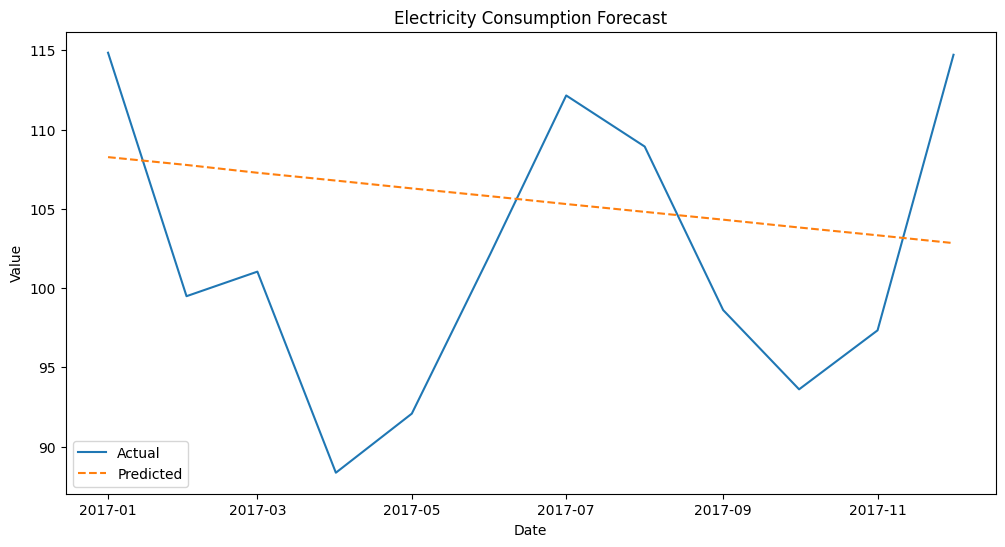

In [20]:
# Forecasting Visualization
plt.figure(figsize=(12, 6))
plt.plot(test_data['DATE'], y_test, label='Actual')  # Plotting against dates now
plt.plot(test_data['DATE'], y_pred, label='Predicted', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.title('Electricity Consumption Forecast')
plt.show()